'''
generate_circle_random_points <- function(n, r)
{
    random_theta <- stats::runif(n) * 2 * base::pi
    random_r <- base::sqrt(stats::runif(n)) * r
    return(list(x = base::cos(random_theta) * random_r, y = base::sin(random_theta) * random_r))
}
'''

c("darkgray", "cornflowerblue", "salmon", "gold", "mediumorchid", "lightgreen", "plum", "lightgoldenrod", "lightgray")

In [1]:
library(tidyverse)
library(igraph)

Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.2”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ──────────────────────────────────────

https://r.igraph.org/articles/igraph.html

In [2]:
colours <- c("red", "blue", "green", "yellow", "orange", "purple", "cyan", "magenta", "brown")

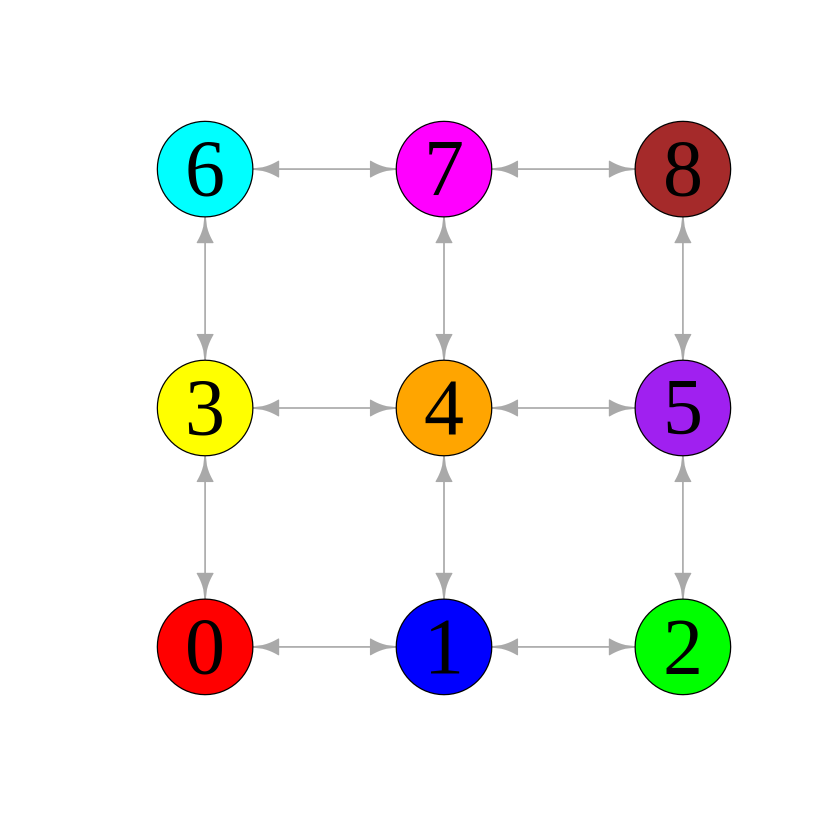

In [3]:
sim_schematic <- igraph::graph_from_literal(0+1+2+5+8+7+6+3+0, 4+1:3:5:7)

base::plot(sim_schematic,
layout = base::matrix(c(0,1,2,2,2,1,0,0,1,0,0,0,1,2,2,2,1,1), nrow = 9, ncol = 2),
vertex.size = 40, 
vertex.color = colours[c(1,2,3,6,9,8,7,4,5)],
vertex.label.color = "black",
vertex.label.cex = 4
)

# save manually at /mnt/archgen/users/lei_huang/RAS_tools/example_simulation/plot_sim/sim_populations.png

In [4]:
library(latex2exp)

In [5]:
library(magick)
library(grid)

Warning message:
“package ‘magick’ was built under R version 4.3.2”


Linking to ImageMagick 6.9.10.23
Enabled features: fontconfig, freetype, fftw, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg

Using 16 threads



In [6]:
popC_label_table <- data.frame(pop_left1 = paste0("ind", c(40:49, 90:99, 140:149, 190:199, 240:249, 290:299, 340:349, 390:399, 440:449)), pop_left1_label = rep(paste0("pop", 0:8, ".group4"), each = 10))

In [7]:
sim_image <- magick::image_read("/mnt/archgen/users/lei_huang/RAS_tools/example_simulation/plot_sim/sim_populations.png")

https://www.sthda.com/english/wiki/ggplot2-axis-scales-and-transformations

4mN = 1; all sites

In [8]:
f3_table <- utils::read.table("result/n50_1/f3_nonmissing.group4_pop_ind.x_group4.all_vars.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_1_allsites <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.066, 0.106)) +
scale_y_continuous(limits = c(0.066, 0.106)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
# insert sim image here
annotation_custom(grid::rasterGrob(sim_image, x = unit(0.7,"npc"), y = unit(0.7,"npc"), width = unit(0.6,"npc"), height = unit(0.6,"npc"))) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [9]:
ggplot_build(plot_1_allsites)$layout$panel_params[[1]]$x.range
ggplot_build(plot_1_allsites)$layout$panel_params[[1]]$y.range

[1] 0.064 0.108

[1] 0.064 0.108

In [10]:
ggplot_build(plot_1_allsites)$layout$panel_params[[1]]$x.range
ggplot_build(plot_1_allsites)$layout$panel_params[[1]]$y.range

[1] 0.064 0.108

[1] 0.064 0.108

In [11]:
layer_scales(plot_1_allsites)#$x$range$range

$x
<ScaleContinuousPosition>
 Range:  0.0662 -- 0.106
 Limits: 0.066 -- 0.106

$y
<ScaleContinuousPosition>
 Range:  0.066 -- 0.106
 Limits: 0.066 -- 0.106


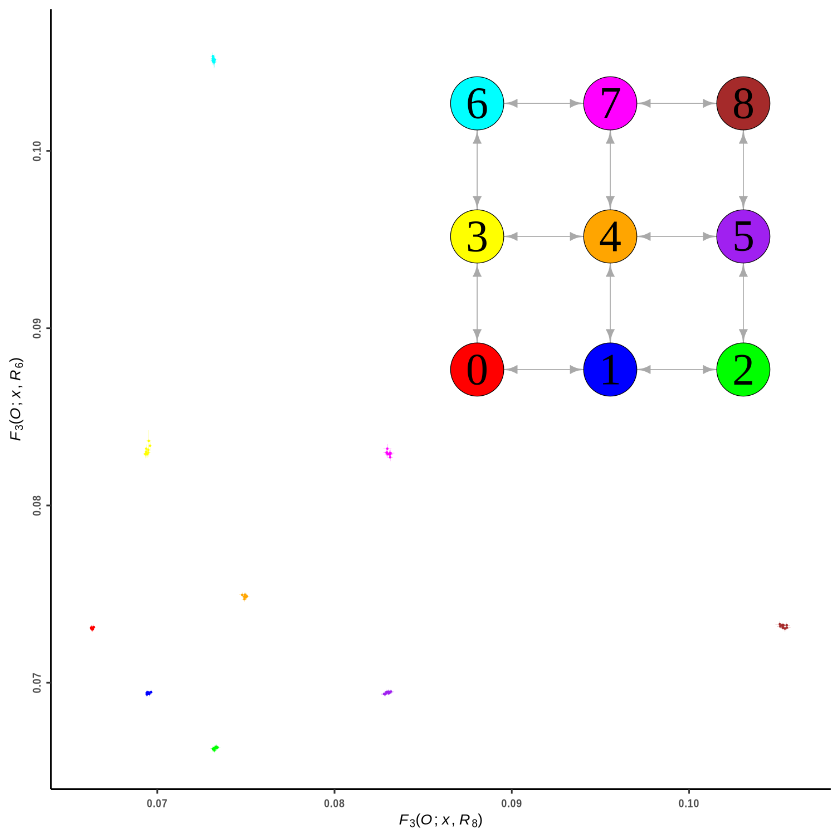

In [12]:
plot_1_allsites

4mN = 1; 1240K

In [13]:
f3_table <- utils::read.table("result/n50_1/f3_nonmissing.group4_pop_ind.x_group4.1240K.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_1_1240K <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.128, 0.21)) +
scale_y_continuous(limits = c(0.128, 0.21)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
# insert sim image here
annotation_custom(grid::rasterGrob(sim_image, x = unit(0.7,"npc"), y = unit(0.7,"npc"), width = unit(0.6,"npc"), height = unit(0.6,"npc"))) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [14]:
ggplot_build(plot_1_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_1_1240K)$layout$panel_params[[1]]$y.range

[1] 0.1239 0.2141

[1] 0.1239 0.2141

In [15]:
ggplot_build(plot_1_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_1_1240K)$layout$panel_params[[1]]$y.range

[1] 0.1239 0.2141

[1] 0.1239 0.2141

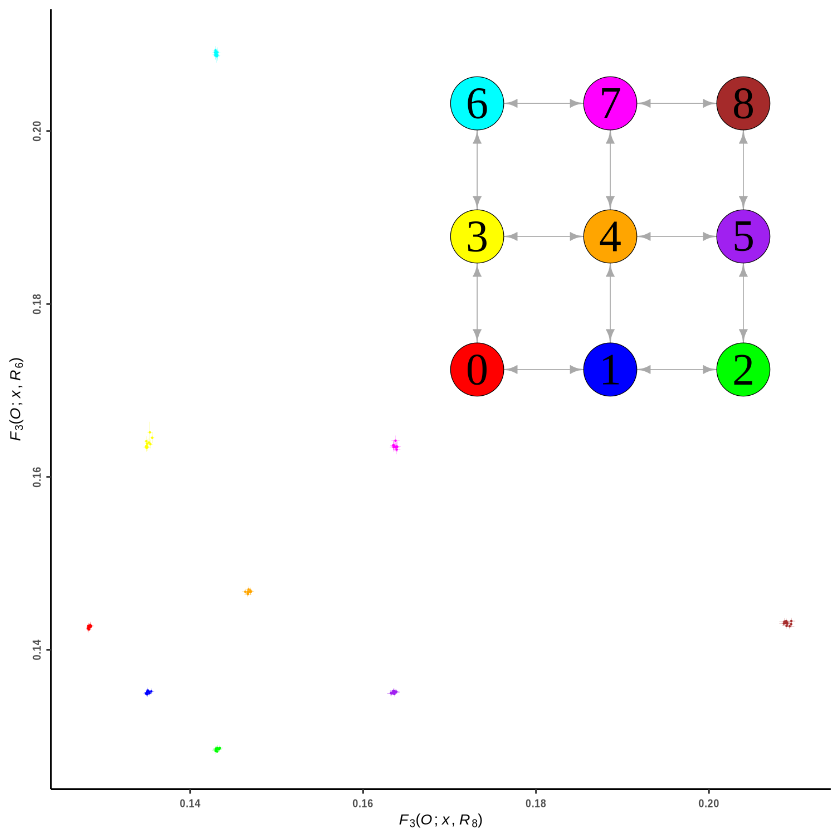

In [16]:
plot_1_1240K

4mN = 1; max_freq = 0.0104

In [17]:
f3_table <- utils::read.table("result/n50_1/f3_nonmissing.group4_pop_ind.x_group4.ascertained.txt", header = TRUE, sep = "\t") %>% filter(max_freq == 0.0104) %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("min_freq" == "min_freq", "max_freq" == "max_freq", "asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_1_asc <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
scale_x_log10(limits = c(2.2e-08, 1.8e-04)) +
scale_y_log10(limits = c(2.2e-08, 1.8e-04)) +
coord_fixed() +
xlab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[8]*")")) +
ylab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [18]:
10^ggplot_build(plot_1_asc)$layout$panel_params[[1]]$x.range
10^ggplot_build(plot_1_asc)$layout$panel_params[[1]]$y.range

[1] 1.402104e-08 2.824327e-04

[1] 1.402104e-08 2.824327e-04

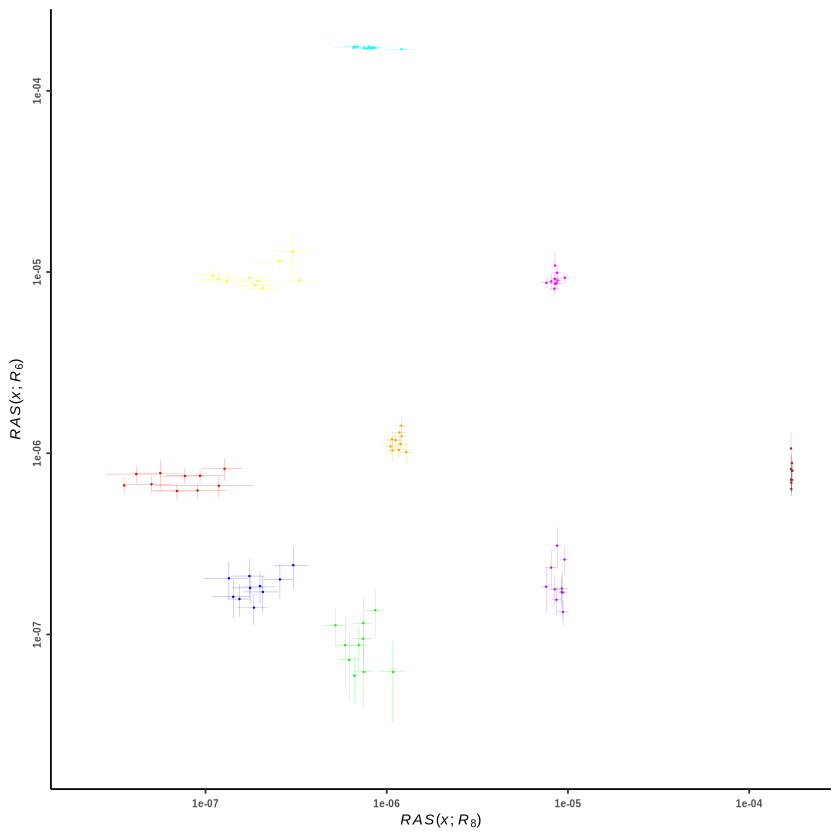

In [19]:
plot_1_asc

4mN = 100; all sites

In [20]:
f3_table <- utils::read.table("result/n50_100/f3_nonmissing.group4_pop_ind.x_group4.all_vars.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_100_allsites <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.0673, 0.0682), breaks=seq(0.0674, 0.0680, 0.0002)) +
scale_y_continuous(limits = c(0.0673, 0.0682), breaks=seq(0.0674, 0.0680, 0.0002)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [21]:
ggplot_build(plot_100_allsites)$layout$panel_params[[1]]$x.range
ggplot_build(plot_100_allsites)$layout$panel_params[[1]]$y.range

[1] 0.067255 0.068245

[1] 0.067255 0.068245

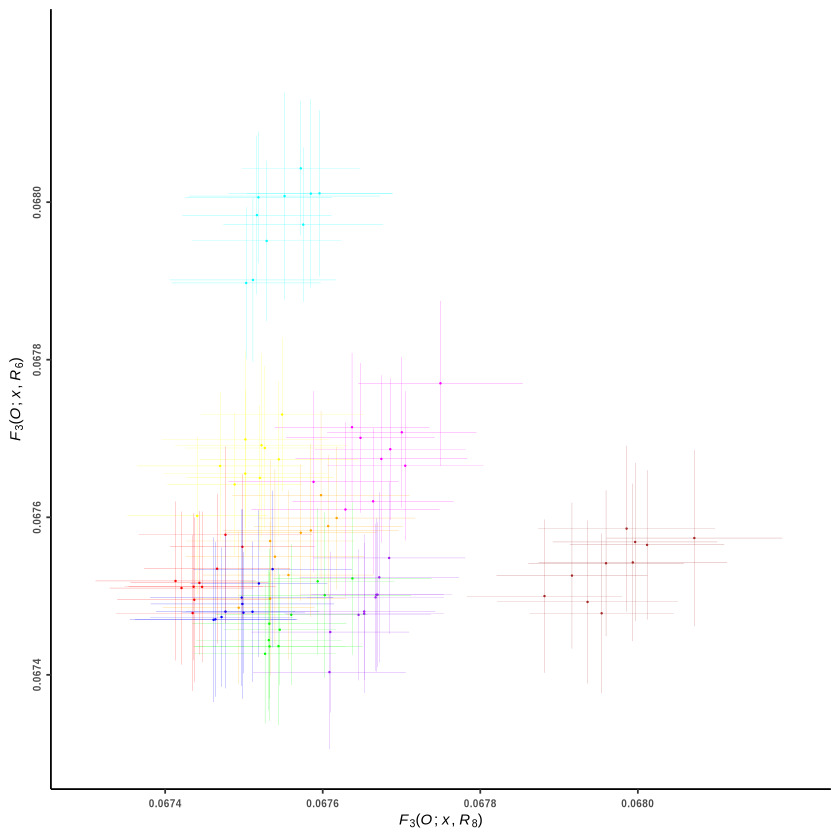

In [22]:
plot_100_allsites

4mN = 100; 1240K

In [23]:
f3_table <- utils::read.table("result/n50_100/f3_nonmissing.group4_pop_ind.x_group4.1240K.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_100_1240K <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.15135, 0.15365), breaks=seq(0.1515, 0.1535, 0.0005)) +
scale_y_continuous(limits = c(0.15135, 0.15365), breaks=seq(0.1515, 0.1535, 0.0005)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [24]:
ggplot_build(plot_100_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_100_1240K)$layout$panel_params[[1]]$y.range

[1] 0.151235 0.153765

[1] 0.151235 0.153765

In [25]:
ggplot_build(plot_100_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_100_1240K)$layout$panel_params[[1]]$y.range

[1] 0.151235 0.153765

[1] 0.151235 0.153765

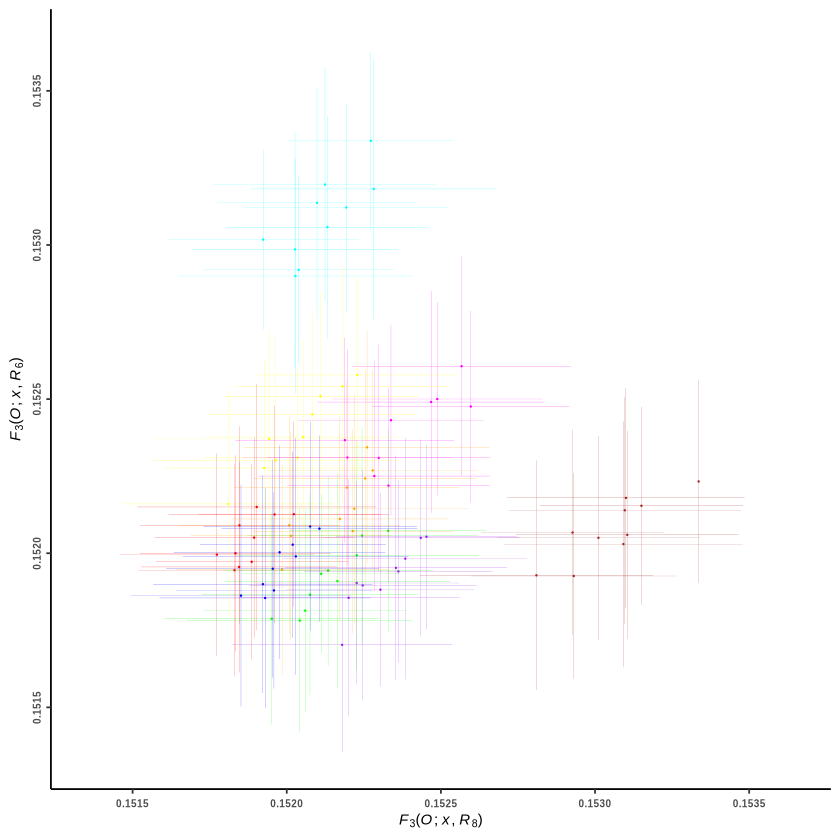

In [26]:
plot_100_1240K

4mN = 100; max_freq = 0.0104

In [27]:
f3_table <- utils::read.table("result/n50_100/f3_nonmissing.group4_pop_ind.x_group4.ascertained.txt", header = TRUE, sep = "\t") %>% filter(max_freq == 0.0104) %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("min_freq" == "min_freq", "max_freq" == "max_freq", "asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_100_asc <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
scale_x_log10(limits = c(1.3e-5, 4.4e-5)) +
scale_y_log10(limits = c(1.3e-5, 4.4e-5)) +
coord_fixed() +
xlab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[8]*")")) +
ylab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [28]:
10^ggplot_build(plot_100_asc)$layout$panel_params[[1]]$x.range
10^ggplot_build(plot_100_asc)$layout$panel_params[[1]]$y.range

[1] 1.223117e-05 4.676578e-05

[1] 1.223117e-05 4.676578e-05

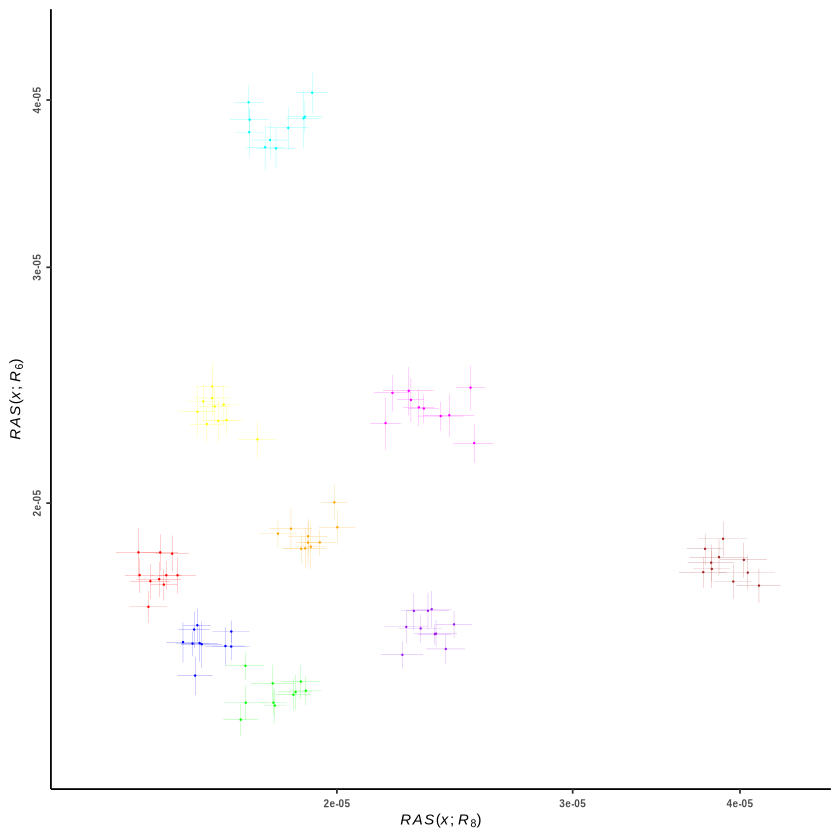

In [29]:
plot_100_asc

4mN = 2000; all sites

In [30]:
f3_table <- utils::read.table("result/n50_2000/f3_nonmissing.group4_pop_ind.x_group4.all_vars.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_2000_allsites <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.06745, 0.06785)) +
scale_y_continuous(limits = c(0.06745, 0.06785)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [31]:
ggplot_build(plot_2000_allsites)$layout$panel_params[[1]]$x.range
ggplot_build(plot_2000_allsites)$layout$panel_params[[1]]$y.range

[1] 0.06743 0.06787

[1] 0.06743 0.06787

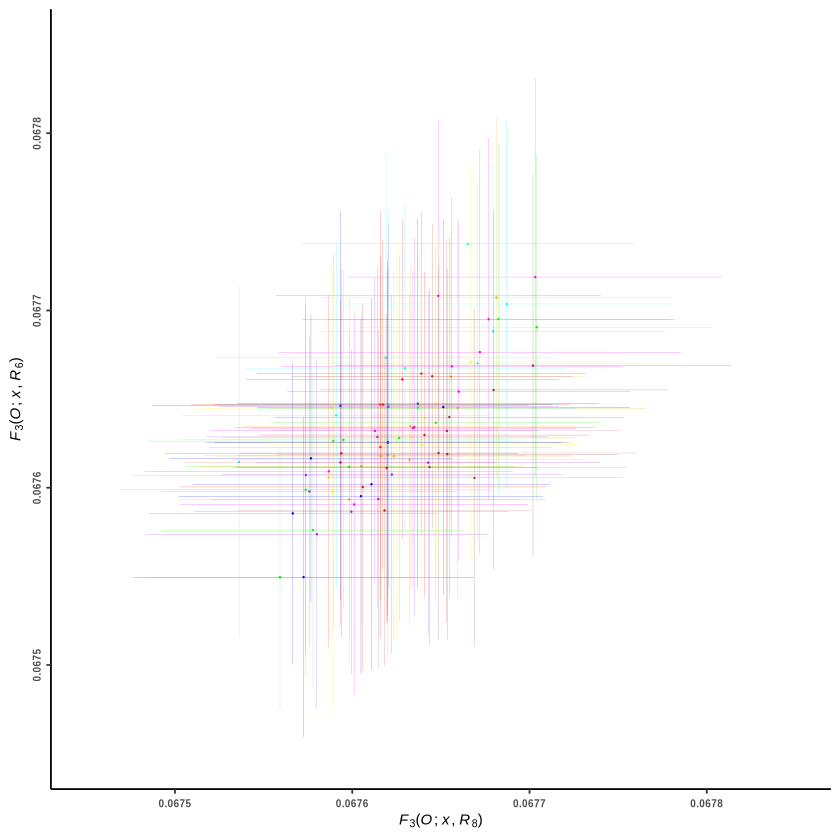

In [32]:
plot_2000_allsites

4mN = 2000; 1240K

In [33]:
f3_table <- utils::read.table("result/n50_2000/f3_nonmissing.group4_pop_ind.x_group4.1240K.txt", header = TRUE, sep = "\t") %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_2000_1240K <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
coord_fixed() +
scale_x_continuous(limits = c(0.1517, 0.1529), breaks=seq(0.1518, 0.1527, 0.0003)) +
scale_y_continuous(limits = c(0.1517, 0.1529), breaks=seq(0.1518, 0.1527, 0.0003)) +
xlab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[8]*")")) +
ylab(bquote(italic(F)[3]*"("*italic(O)*"; "*italic(x)*", "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [34]:
ggplot_build(plot_2000_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_2000_1240K)$layout$panel_params[[1]]$y.range

[1] 0.15164 0.15296

[1] 0.15164 0.15296

In [35]:
ggplot_build(plot_2000_1240K)$layout$panel_params[[1]]$x.range
ggplot_build(plot_2000_1240K)$layout$panel_params[[1]]$y.range

[1] 0.15164 0.15296

[1] 0.15164 0.15296

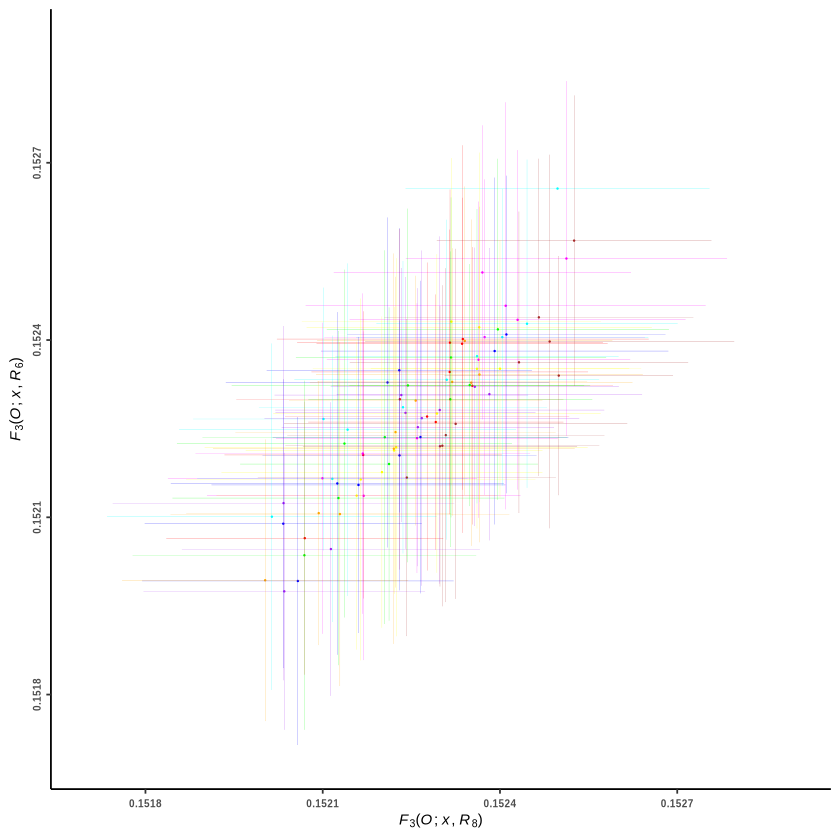

In [36]:
plot_2000_1240K

4mN = 2000; max_freq = 0.0104

In [37]:
f3_table <- utils::read.table("result/n50_2000/f3_nonmissing.group4_pop_ind.x_group4.ascertained.txt", header = TRUE, sep = "\t") %>% filter(max_freq == 0.0104) %>% dplyr::inner_join(popC_label_table, by = join_by(pop_left1 == pop_left1))

f3_table_2ref <- full_join(f3_table %>% filter(pop_right1=="pop8.x_group4"), f3_table %>% filter(pop_right1=="pop6.x_group4"), by=join_by("min_freq" == "min_freq", "max_freq" == "max_freq", "asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "pop_left1_label"=="pop_left1_label", "Nr_sites"=="Nr_sites", "Nr_blocks"=="Nr_blocks"))

plot_2000_asc <- ggplot(data = f3_table_2ref, mapping = aes(x = f_value.x, y = f_value.y, colour=factor(pop_left1_label))) +
scale_colour_manual(values=colours) +
geom_point(size=0.05) +
geom_errorbar(mapping = aes(xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.05) + 
geom_errorbar(mapping = aes(ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.05) +
scale_x_log10(limits = c(1.86e-5, 2.66e-5), breaks=c(2e-5, 2.2e-5, 2.4e-5, 2.6e-5)) +
scale_y_log10(limits = c(1.86e-5, 2.66e-5), breaks=c(2e-5, 2.2e-5, 2.4e-5, 2.6e-5)) +
coord_fixed() +
xlab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[8]*")")) +
ylab(bquote(italic(RAS)*"("*italic(x)*"; "*italic(R)[6]*")")) +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=9, angle=0),
    axis.title.y=element_text(face="bold", size=9, angle=90),
    axis.text.x=element_text(face="bold", size=6, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=6, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


In [38]:
10^ggplot_build(plot_2000_asc)$layout$panel_params[[1]]$x.range
10^ggplot_build(plot_2000_asc)$layout$panel_params[[1]]$y.range

[1] 1.827025e-05 2.708009e-05

[1] 1.827025e-05 2.708009e-05

In [39]:
pmax(c(1,3),c(2,4))

[1] 2 4

In [40]:
ggplot_build(plot_2000_asc)$layout$panel_params[[1]]

$x
<ggproto object: Class ViewScale, gg>
    aesthetics: x xmin xmax xend xintercept xmin_final xmax_final xlower ...
    break_positions: function
    break_positions_minor: function
    breaks: -4.69897000433602 -4.65757731917779 -4.61978875828839 -4 ...
    continuous_range: -4.73825549040274 -4.56734992874828
    dimension: function
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    get_transformation: function
    guide: waiver
    is_discrete: function
    is_empty: function
    limits: -4.73048705578208 -4.57511836336893
    make_title: function
    map: function
    minor_breaks: -4.71966634691513 -4.69897000433602 -4.67827366175691 -4 ...
    name: waiver
    position: bottom
    rescale: function
    scale: <ggproto object: Class ScaleContinuousPosition, ScaleContinuous, Scale, gg>
        aesthetics: x xmin xmax xend xintercept xmin_final xmax_final xlower ...
        axis_order: function
        break_info: function

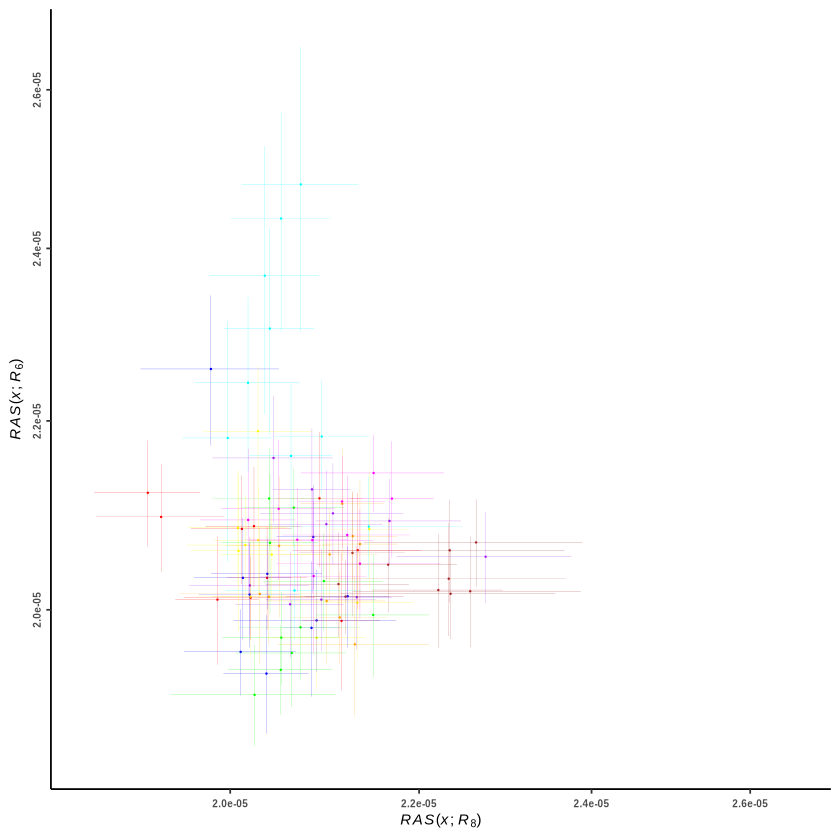

In [41]:
plot_2000_asc

In [42]:
library(cowplot)

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [43]:
plot_sim <- cowplot::plot_grid(plot_1_allsites, plot_100_allsites, plot_2000_allsites, plot_1_asc, plot_100_asc, plot_2000_asc, labels = c("A", "B", "C", "D", "E", "F"), ncol=3, nrow=2)

In [44]:
ggsave(plot_sim, filename=paste0("plot_sim/plot_sim.pdf"), limitsize=FALSE,  width=18, height=12, units="cm")

In [45]:
plot_sim_supp <- cowplot::plot_grid(plot_1_1240K, plot_100_1240K, plot_2000_1240K, labels = c("A", "B", "C"), ncol=3, nrow=1)

In [46]:
ggsave(plot_sim_supp, filename=paste0("plot_sim/plot_sim_supp.pdf"), limitsize=FALSE,  width=18, height=6, units="cm")